Using TensorFlow backend.


22/22 [==============================] - 0s 45us/step
accuracy: 59.09%
22/22 [==============================] - 0s 0us/step
accuracy: 45.45%
22/22 [==============================] - 0s 45us/step
accuracy: 4.55%
22/22 [==============================] - 0s 0us/step
accuracy: 22.73%
22/22 [==============================] - 0s 45us/step
accuracy: 68.18%
22/22 [==============================] - 0s 999us/step


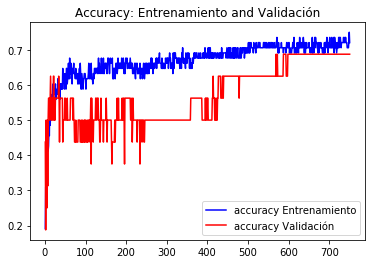

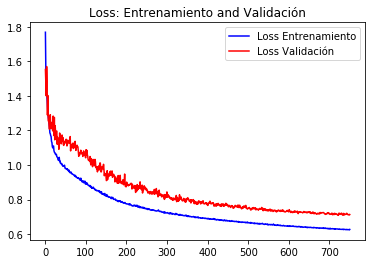

22/22 [==============================] - 0s 2ms/step
accuracy: 72.73%
Confusion Matrix

[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [22 21 14 15 16 18]
 [ 0  0  0  0  0  0]]

Classification Report

              precision    recall  f1-score   support

         adi       0.00      0.00      0.00         0
         car       0.00      0.00      0.00         0
         fad       0.00      0.00      0.00         0
         gla       0.00      0.00      0.00         0
         mas       1.00      0.15      0.26       106
         con       0.00      0.00      0.00         0

    accuracy                           0.15       106
   macro avg       0.17      0.03      0.04       106
weighted avg       1.00      0.15      0.26       106



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from keras.models import model_from_json
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K
import numpy as np

data = pd.read_csv('data.csv', sep=';')
dataset = data
# one hot encoded clases
def norm(dataset):
    max = dataset.max()
    min = dataset.min()
    return (dataset - min)/(max - min)

le = LabelEncoder()
le.fit(data['Class'].values)
integer_encoded = le.transform(data['Class'].values)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

target_names = data['Class'].values
data.pop('Class')
data.pop('Case')

X_train, X_test, y_train, y_test = train_test_split(
  data.values, onehot_encoded, test_size=0.2, random_state=1)

kfold = StratifiedKFold(n_splits=5)

# para guardar los puntajes
cvscores = []
filepath="weights.best.h5"    # nombre fijo, se reemplazan los pesos constantemente
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]
# ciclo para los 10-fold

for (index_train, index_val) in kfold.split(X_train, np.argmax(y_train, 1)):
    # modelo
    K.clear_session()
    model = Sequential()
    model.add(Dense(3, input_dim=9, activation="relu", kernel_initializer="uniform"))
    model.add(Dense(12, activation="selu", kernel_initializer="uniform"))
    model.add(Dense(9, activation="selu", kernel_initializer="uniform"))
    model.add(Dense(6, activation="softmax", kernel_initializer="normal"))
    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    # ajustar
    history = model.fit(X_train[index_train], y_train[index_train], validation_data=(X_train[index_val], y_train[index_val]), epochs=750, batch_size=8,callbacks=callbacks_list, verbose=0)
    scores = model.evaluate(X_test,  y_test)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
scores = model.evaluate(X_test,  y_test)
cvscores.append(scores[1] * 100)
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'b', label='accuracy Entrenamiento')
plt.plot(epochs, val_acc, 'r', label='accuracy Validación')
plt.title('Accuracy: Entrenamiento and Validación')
plt.legend()
plt.savefig("Fig1.png")

# gráfico para la pérdida obtenido de los datos de la historia
plt.figure()
plt.plot(epochs, loss, 'b', label='Loss Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Loss Validación')
plt.title('Loss: Entrenamiento and Validación')
plt.legend()
plt.savefig("Fig2.png")
plt.show()

model = Sequential()
model.add(Dense(3, input_dim=9, activation="relu", kernel_initializer="uniform"))
model.add(Dense(12, activation="selu", kernel_initializer="uniform"))
model.add(Dense(9, activation="selu", kernel_initializer="uniform"))
model.add(Dense(6, activation="softmax", kernel_initializer="normal"))
model.load_weights("weights.best.h5")
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
scores = model.evaluate(X_test,  y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

data.values
onehot_encoded

Y_pred = model.predict(norm(data.values))
Y_pred = numpy.argmax(Y_pred, axis=1)

y_hat = np.argmax(onehot_encoded, -1)
# y_pred_decode = le.inverse_transform(y_pred)

print('''Confusion Matrix

{}

Classification Report

{}'''.format(confusion_matrix(Y_pred, y_hat),
classification_report(Y_pred, y_hat, target_names=list(set(target_names)))))


In [17]:
print(Y_pred)
print(y_hat)
print(model.predict(norm(data.values)))


[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.01597262 0.40286663 0.24807215 0.3278653  0.00450581 0.00071749]
 [0.01597178 0.40285212 0.2480638  0.32788843 0.00450613 0.00071772]
 [0.01597446 0.40289858 0.2480906  0.3278143  0.00450512 0.00071697]
 [0.01597261 0.40286666 0.24807212 0.32786533 0.00450581 0.00071749]
 [0.01597178 0.40285218 0.24806385 0.32788825 0.00450612 0.00071772]
 [0.01597141 0.4028458  0.24806009 0.32789862 0.00450626 0.00071782]
 [0.01597112 0.40284064 0.24805716 0.3279067  0.00450638 0.00071791]
 [0.0159713  0.40284395 0.24805906 0.32790157 0.0045063  0.00071785]
 [0.01597342 0.4

32/32 [==============================] - 0s 0us/step
accuracy: 62.50%
32/32 [==============================] - 0s 31us/step
accuracy: 62.50%
32/32 [==============================] - 0s 31us/step
accuracy: 56.25%
32/32 [==============================] - 0s 31us/step
accuracy: 71.88%
32/32 [==============================] - 0s 31us/step
accuracy: 65.62%
32/32 [==============================] - 0s 0us/step
accuracy: 62.50%
32/32 [==============================] - 0s 686us/step


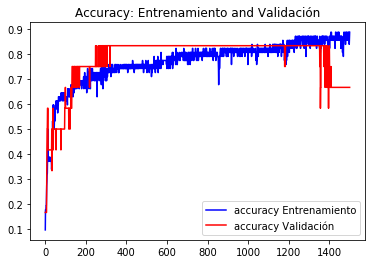

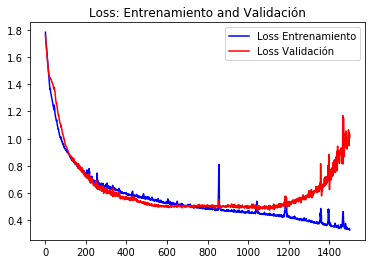

In [5]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from keras.models import model_from_json
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K
import numpy as np

data = pd.read_csv('data.csv', sep=';')
dataset = data
# one hot encoded clases
def norm(dataset):
    max = dataset.max()
    min = dataset.min()
    return (dataset - min)/(max - min)

le = LabelEncoder()
le.fit(data['Class'].values)
integer_encoded = le.transform(data['Class'].values)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

target_names = data['Class'].values
data.pop('Class')
data.pop('Case')

X_train, X_test, y_train, y_test = train_test_split(data.values, onehot_encoded, test_size=0.3, random_state=1)

kfold = StratifiedKFold(n_splits=6)

# para guardar los puntajes
cvscores = []
filepath="weights.best.h5"    # nombre fijo, se reemplazan los pesos constantemente
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]
# ciclo para los 10-fold

for i, (index_train, index_val) in enumerate(kfold.split(X_train, np.argmax(y_train, 1))):
    filepath = "weights.best_{}.h5".format(i)
    checkpoint = ModelCheckpoint(filepath, save_best_only=True)
    callbacks_list = [checkpoint]
    # modelo
    K.clear_session()
    model = Sequential()
    model.add(Dense(9, input_dim=9, activation="relu", kernel_initializer="uniform"))
    model.add(Dense(7, activation="selu", kernel_initializer="uniform"))
    model.add(Dense(6, activation="selu", kernel_initializer="uniform"))
    model.add(Dense(6, activation="softmax", kernel_initializer="normal"))
    # compilar
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # ajustar
    history = model.fit(X_train[index_train], y_train[index_train], validation_data=(X_train[index_val], y_train[index_val]), epochs=1500, batch_size=8,callbacks=callbacks_list, verbose=0)
    scores = model.evaluate(X_test,  y_test)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
scores = model.evaluate(X_test,  y_test)
cvscores.append(scores[1] * 100)
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'b', label='accuracy Entrenamiento')
plt.plot(epochs, val_acc, 'r', label='accuracy Validación')
plt.title('Accuracy: Entrenamiento and Validación')
plt.legend()
plt.savefig("Fig1.png")

# gráfico para la pérdida obtenido de los datos de la historia
plt.figure()
plt.plot(epochs, loss, 'b', label='Loss Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Loss Validación')
plt.title('Loss: Entrenamiento and Validación')
plt.legend()
plt.savefig("Fig2.png")
plt.show()